## Adult Dataset Part 1: Cleaning and Preparation

#### Objectives:
1. Preprocess the data and store the cleaned dataset as adult_clean.csv
2. Load clean dataset and test supervised/unsupervised models
    - Goal: Determine best model to predict if new entry earns >50k or <50k with supervised learning
    - Goal: Find insights and patterns in data using unspuervised learning
3. Apply k-folds cross validation
    - Goal: Evaluate robustness of results across different models.
    - Goal: Use and justify different error metrics


#### Summary of dataset

Datasource: https://archive.ics.uci.edu/ml/datasets/adult

Feature descrptions copied below from the UCI website:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: Continuous. A weighting assigned from the sampling process.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous.
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- target: >50K, <=50K.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#original data does not come with headers. add headers based on the documentation descrption
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'target']

In [4]:
data = pd.read_csv('./data/adult.data', names = headers)
df = data.copy()

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


On first look, it appears there are no missing values. **However the dataset descrption indicates that missing values have been flled with '?'.** Figure out what to do here :)

In [7]:
for i in df.columns:
    print("_____%s_____" % i)
    if '?' in df[i].unique(): print("THERE ? VALUE")
    print(df[i].unique())



_____age_____
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
_____workclass_____
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
_____fnlwgt_____
[ 77516  83311 215646 ...  34066  84661 257302]
_____education_____
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
_____education-num_____
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
_____marital-status_____
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
_____occupation_____
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sale

In [8]:
df.isin([' ?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

Before deciding **how to deal with the missing values want to know how they influence the data**. For example, if workclass and occupation for example both have missing values (in the same tuple) it would be reasonable to drop the data.

In [11]:
df.groupby(['occupation','workclass']).isin([' ?']).sum(axis=0)

AttributeError: 'DataFrameGroupBy' object has no attribute 'isin'

**What % of the dataset do nans represent?** What is the **best approach** for dealing with the nan's?

array([<AxesSubplot:title={'center':'age'}>,
       <AxesSubplot:title={'center':'fnlwgt'}>,
       <AxesSubplot:title={'center':'education-num'}>,
       <AxesSubplot:title={'center':'capital-gain'}>,
       <AxesSubplot:title={'center':'capital-loss'}>,
       <AxesSubplot:title={'center':'hours-per-week'}>], dtype=object)

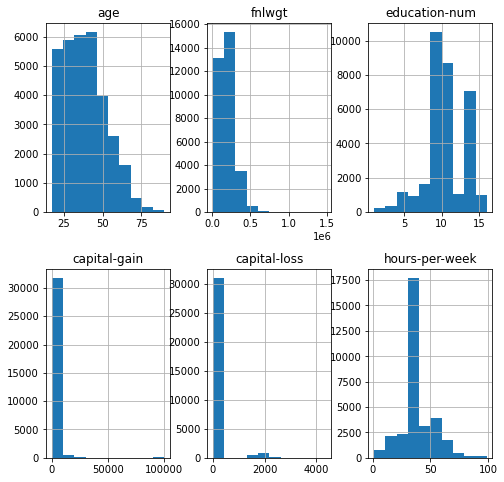

In [47]:
fig, axis = plt.subplots(2,3,figsize=(8,8))
df.hist(ax=axis)


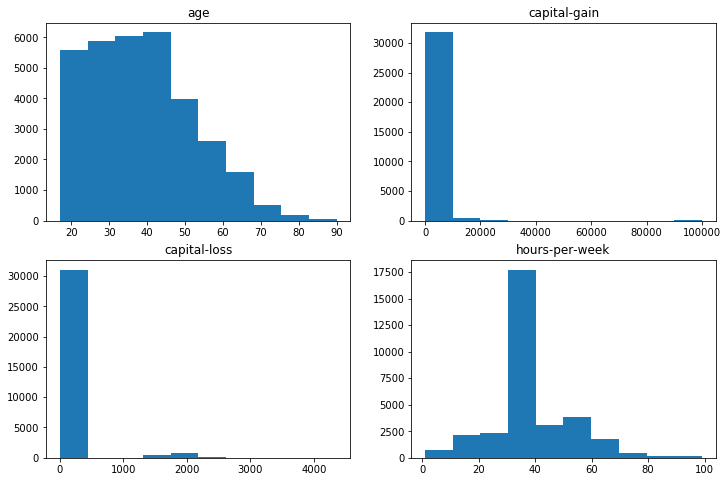

In [81]:
#plot the numerical columns


#### Additional Steps:
1. Apply statistical tests to determine if dropping values changes the structure of the distribution in the workplace, occupation, and native-country categories i.e. t-test for differnce of modes. 
2. Compare filling the workplace and occupation columns with mode values and applying same statistical tests.

In [ ]:
#train / test... you know the drill

# Discussion of results